# Data Analysis in Python

Let's start with some basic data analysis in Python! Therefor we need two popular python packages

- ***Pandas***: "[pandas](https://pandas.pydata.org) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language*"


- ***Matplotlib***: "[Matplotlib](https://matplotlib.org) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms*"

<img src="images/pandas_matplotlib.png" width=200 align=right />

## Installation

```conda install pandas matplotlib```

OR

```pip install pandas matplotlib```


## Powerful pandas

Pandas is a very powerful and flexible tool for data munging and preparing. 

Pandas deals with 3 data structures:
- **Series**: homogeneous 1-dimensional array
- **DataFrames**: heterogenous 2-dimensional array
- **Panel**: heterogenous 3-dimensional array


<img src="images/dataframe.png" width=400   />

### Pandas Series

A Series is a one-dimensional object similar to an array, list, or column in a table.

In [4]:
import pandas as pd

In [ ]:
# create a Series with an arbitrary list
s = pd.Series(['Würzburg',127.880, 177, 87.6 ])
s

Pandas by default creates an index from 0 to N for each item. Of course we can also define our own index

In [ ]:
s = pd.Series(['Würzburg',127.880, 177, 87.6],
              index=['Name', 'Population', 'Altitude', 'Area'])
s

You can also use dictionaries to create a pandas series

In [ ]:
d = {'Name': 'Würzburg', 'Population': 127.880, 'Altitude': 177, 'Area': 87.6}
s = pd.Series(d)
s

We can now use the index to select specific items from the Series or just use integer indexing/slicing

In [ ]:
s['Name']
s[0]
s[:2]

### DataFrames

In order to create a Pandas DataFrame we can pass a dictionary of lists to the DataFrame constructor. 

In [ ]:
data = {'City': ['Madrid', 'Berlin', 'Lisbon', 'Paris', 'Rome', 'Copenhagen', 'London'],
        'Elevation': [667, 34, 15, 34, 14, 10, 14],
        'Population': [3266126, 3664088, 544851, 2165423, 2837332, 805420, 9002488],
        'Country': ['Spain', 'Germany', 'Portugal', 'France', 'Italy', 'Denmark', 'United Kingdom']}
cities = pd.DataFrame(data, columns=['City', 'Elevation', 'Population', 'Country'])
cities

Much more often, you'll have a dataset you want to read into a DataFrame. Lets read a real world dataset into python. The dataset contains several observations from three different weather stations (5705:'Würzburg',282:'Bamberg',1420:'Frankfurt'). The pd.read_csv function is used to read a CSV file into a DataFrame in our Python environment. Of course pandas can read much more file formats than csv files. For more information have a look at https://pandas.pydata.org/docs/user_guide/io.html

In [5]:
import pandas as pd

df = pd.read_csv('../Data/nonspatial/station_data.csv', sep=',')
df

,station_id,dataset,parameter,date,value,quality
0,282,climate_summary,temperature_air_mean_200,1949-01-01 00:00:00+00:00,276.95,5.0
1,282,climate_summary,temperature_air_mean_200,1949-01-02 00:00:00+00:00,275.85,5.0
2,282,climate_summary,temperature_air_mean_200,1949-01-03 00:00:00+00:00,275.85,5.0
3,282,climate_summary,temperature_air_mean_200,1949-01-04 00:00:00+00:00,274.95,5.0
4,282,climate_summary,temperature_air_mean_200,1949-01-05 00:00:00+00:00,275.75,5.0
...,...,...,...,...,...,...
322875,5705,climate_summary,precipitation_height,2021-12-27 00:00:00+00:00,1.50,3.0
322876,5705,climate_summary,precipitation_height,2021-12-28 00:00:00+00:00,14.90,3.0
322877,5705,climate_summary,precipitation_height,2021-12-29 00:00:00+00:00,2.70,3.0
322878,5705,climate_summary,precipitation_height,2021-12-30 00:00:00+00:00,1.20,3.0


Note that rows and columns are labelled using indices

In this case:

- Rows are labelled with integers

- Columns are labelled with column names

## Data exploration


### DataFrame Porperties

First of all we want to have a first glance at the data we are dealing with. Pandas provides in-built functions for data inspection. The properties tail() and head() allow us to look at the first/last rows of our datafame

In [ ]:
df.head()

In [ ]:
df.tail()               # show data tail

DataFrame dimensions are accessible through .shape()

In [ ]:
df.shape

The DataFrame column names can be obtained using .columns()

In [ ]:
df.columns # display column names

If we want to know the data types of our columns we can just use .dtype

In [ ]:
df.dtypes

The .info() function is used to get a concise summary of the dataframe.

In [ ]:
df.info()

The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution,

In [ ]:
df.describe()

### Subsetting data

There are numerous methods of subsetting Series and DataFrames in pandas and its sometimes confusing.
The recommended subsetting methods are using .loc and .iloc. The principal difference between .loc and .iloc is:

- .loc uses pandas indices, while
- .iloc uses (implicit) numpy-style numeric indices.

A DataFrame is a 2-dimensional object, thats why .loc and .iloc accept 2 values which a seperated by a comma. The first one for the row and the second one for the column

### Selecting columns

In [ ]:
df.loc[:, "parameter"] # select column as Series

df.loc[:, ["parameter"]] # select column as DataFrame

df["parameter"]  ## Shortcut for df.loc[:, "AverageTemperature"]

df[["parameter"]]  ## Shortcut for df.loc[:, ["AverageTemperature"]]

df[["parameter", "value"]] ## Select multiple columns

df.loc[:,"station_id":"date"] ## Slice columns

### Selecting rows

Rows can be selected using the same way using .loc() and .iloc()

In [ ]:
df.iloc[[0], :]     ## get 1st row

df.iloc[0:3, :]     ## 1st row (inclusive) to 4th row (exclusive)

df.iloc[[0, 12], :]  ## get first and 13th row

df.loc[[0, 12], :]  ## get first and 13th row

### Select rows and columns
Of course we can also combine the methods we used above

In [ ]:
df.iloc[0:4, 0:2] 

df.loc[:, "station_id":"date"].iloc[0:4, :]

###  Summary functions

Pandas provides a large set of Operators and summary functions that operate on different kinds of pandas object. Let us use this to find out more about our dataset.  

In [ ]:
## time period
 
df['date'].min()
df['date'].max()

In [ ]:
## parameters measured

df['parameter'].unique()

In [ ]:
## mean quality

df['quality'].mean()

In [ ]:
## number of observations by station

df['station_id'].value_counts()

###  Filtering

Additionally we can use conditional statements in order to filter our dataframe. In this example we want to extract the mean preciptation for the station Würzburg

In [6]:
## extract all data for station Würzburg

df_wue = df.loc[df['station_id'] == 5705]
df_wue

,station_id,dataset,parameter,date,value,quality
213304,5705,climate_summary,temperature_air_mean_200,1947-01-01 00:00:00+00:00,270.35,5.0
213305,5705,climate_summary,temperature_air_mean_200,1947-01-02 00:00:00+00:00,272.55,5.0
213306,5705,climate_summary,temperature_air_mean_200,1947-01-03 00:00:00+00:00,272.45,5.0
213307,5705,climate_summary,temperature_air_mean_200,1947-01-04 00:00:00+00:00,264.95,5.0
213308,5705,climate_summary,temperature_air_mean_200,1947-01-05 00:00:00+00:00,260.25,5.0
...,...,...,...,...,...,...
322875,5705,climate_summary,precipitation_height,2021-12-27 00:00:00+00:00,1.50,3.0
322876,5705,climate_summary,precipitation_height,2021-12-28 00:00:00+00:00,14.90,3.0
322877,5705,climate_summary,precipitation_height,2021-12-29 00:00:00+00:00,2.70,3.0
322878,5705,climate_summary,precipitation_height,2021-12-30 00:00:00+00:00,1.20,3.0


Of course we can also filter data using multiple conditions

In [7]:
prec_wue = df.loc[(df['station_id'] == 5705) & (df['parameter'] == 'precipitation_height') ]
prec_wue['value'].max()

71.1

Sometimes the condition we are interested in is not only one individual value, but multiple values. Therefor we could of course just use something like that:

In [8]:
df[(df['station_id'] == 5705) | (df['station_id'] == 282)]

,station_id,dataset,parameter,date,value,quality
0,282,climate_summary,temperature_air_mean_200,1949-01-01 00:00:00+00:00,276.95,5.0
1,282,climate_summary,temperature_air_mean_200,1949-01-02 00:00:00+00:00,275.85,5.0
2,282,climate_summary,temperature_air_mean_200,1949-01-03 00:00:00+00:00,275.85,5.0
3,282,climate_summary,temperature_air_mean_200,1949-01-04 00:00:00+00:00,274.95,5.0
4,282,climate_summary,temperature_air_mean_200,1949-01-05 00:00:00+00:00,275.75,5.0
...,...,...,...,...,...,...
322875,5705,climate_summary,precipitation_height,2021-12-27 00:00:00+00:00,1.50,3.0
322876,5705,climate_summary,precipitation_height,2021-12-28 00:00:00+00:00,14.90,3.0
322877,5705,climate_summary,precipitation_height,2021-12-29 00:00:00+00:00,2.70,3.0
322878,5705,climate_summary,precipitation_height,2021-12-30 00:00:00+00:00,1.20,3.0


.. or we can use the .isin() method

In [9]:
sel = df['station_id'].isin([5705,282])
df[sel]

,station_id,dataset,parameter,date,value,quality
0,282,climate_summary,temperature_air_mean_200,1949-01-01 00:00:00+00:00,276.95,5.0
1,282,climate_summary,temperature_air_mean_200,1949-01-02 00:00:00+00:00,275.85,5.0
2,282,climate_summary,temperature_air_mean_200,1949-01-03 00:00:00+00:00,275.85,5.0
3,282,climate_summary,temperature_air_mean_200,1949-01-04 00:00:00+00:00,274.95,5.0
4,282,climate_summary,temperature_air_mean_200,1949-01-05 00:00:00+00:00,275.75,5.0
...,...,...,...,...,...,...
322875,5705,climate_summary,precipitation_height,2021-12-27 00:00:00+00:00,1.50,3.0
322876,5705,climate_summary,precipitation_height,2021-12-28 00:00:00+00:00,14.90,3.0
322877,5705,climate_summary,precipitation_height,2021-12-29 00:00:00+00:00,2.70,3.0
322878,5705,climate_summary,precipitation_height,2021-12-30 00:00:00+00:00,1.20,3.0


### Sorting

A DataFrame can be sorted using the .sort_values method. We can of course also sort by index using .sort_index()

In [10]:

temp_wue = df.loc[(df['station_id'] == 5705) & (df['parameter'] == 'temperature_air_mean_200') ]

temp_wue.sort_values(by = 'value')                   #Order rows by values of a column (low to high).
temp_wue.sort_values(by = 'value', ascending=False)   #Order rows by values of a column (high to low).

,station_id,dataset,parameter,date,value,quality
238359,5705,climate_summary,temperature_air_mean_200,2015-08-07 00:00:00+00:00,303.45,10.0
239807,5705,climate_summary,temperature_air_mean_200,2019-07-25 00:00:00+00:00,303.35,3.0
238325,5705,climate_summary,temperature_air_mean_200,2015-07-04 00:00:00+00:00,303.25,10.0
239808,5705,climate_summary,temperature_air_mean_200,2019-07-26 00:00:00+00:00,302.95,3.0
233982,5705,climate_summary,temperature_air_mean_200,2003-08-13 00:00:00+00:00,302.35,10.0
...,...,...,...,...,...,...
220986,5705,climate_summary,temperature_air_mean_200,1968-01-13 00:00:00+00:00,257.25,5.0
221694,5705,climate_summary,temperature_air_mean_200,1969-12-21 00:00:00+00:00,256.35,5.0
216630,5705,climate_summary,temperature_air_mean_200,1956-02-09 00:00:00+00:00,256.15,5.0
227191,5705,climate_summary,temperature_air_mean_200,1985-01-08 00:00:00+00:00,254.95,10.0


## Data manipulation

In the next section we will prepare our dataset for analysis using some of the basic data manipulation methods in provided by pandas. In this example we will

- change station_id to actual station names
- reshape dataset from long to wide format
- use timestamps as index
- convert temperature data to celsius
- make some first visualisation

### Remapping  values

First of all we want to replace our station_id with the real world name of the station. 

In [11]:
new_values = {5705:'Würzburg',282:'Bamberg',1420:'Frankfurt'}

df2=df.replace({"station_id": new_values})

df2

,station_id,dataset,parameter,date,value,quality
0,Bamberg,climate_summary,temperature_air_mean_200,1949-01-01 00:00:00+00:00,276.95,5.0
1,Bamberg,climate_summary,temperature_air_mean_200,1949-01-02 00:00:00+00:00,275.85,5.0
2,Bamberg,climate_summary,temperature_air_mean_200,1949-01-03 00:00:00+00:00,275.85,5.0
3,Bamberg,climate_summary,temperature_air_mean_200,1949-01-04 00:00:00+00:00,274.95,5.0
4,Bamberg,climate_summary,temperature_air_mean_200,1949-01-05 00:00:00+00:00,275.75,5.0
...,...,...,...,...,...,...
322875,Würzburg,climate_summary,precipitation_height,2021-12-27 00:00:00+00:00,1.50,3.0
322876,Würzburg,climate_summary,precipitation_height,2021-12-28 00:00:00+00:00,14.90,3.0
322877,Würzburg,climate_summary,precipitation_height,2021-12-29 00:00:00+00:00,2.70,3.0
322878,Würzburg,climate_summary,precipitation_height,2021-12-30 00:00:00+00:00,1.20,3.0


### Reshaping dataframe

Pandas offers different functions to rehape your dataframe

<img src="images/reshaping.png" width=700   />

https://pandas.pydata.org/

In [12]:
data = df2.pivot(index=['date','station_id'], columns='parameter', values='value').reset_index()
data

parameter,date,station_id,precipitation_height,temperature_air_max_200,temperature_air_mean_200,temperature_air_min_200
0,1947-01-01 00:00:00+00:00,Würzburg,2.4,NaN,270.35,NaN
1,1947-01-02 00:00:00+00:00,Würzburg,0.4,NaN,272.55,NaN
2,1947-01-03 00:00:00+00:00,Würzburg,0.0,NaN,272.45,NaN
3,1947-01-04 00:00:00+00:00,Würzburg,0.0,NaN,264.95,NaN
4,1947-01-05 00:00:00+00:00,Würzburg,0.0,NaN,260.25,NaN
...,...,...,...,...,...,...
80715,2021-12-30 00:00:00+00:00,Frankfurt,1.0,289.65,286.35,283.35
80716,2021-12-30 00:00:00+00:00,Würzburg,1.2,288.05,285.65,282.95
80717,2021-12-31 00:00:00+00:00,Bamberg,0.0,287.95,284.85,278.95
80718,2021-12-31 00:00:00+00:00,Frankfurt,0.0,286.15,284.75,281.75


## Modifying the index

As we will see, the index plays an important role in many operations in pandas. Therefore, often we would like to set a more meaningful, custom index. Especially when dealing with time series data we want to set the index to the time points 

- .index for Series 
- .set_index for DataFrame 

In [13]:
data = data.set_index('date')                   
data.head()
data

parameter,station_id,precipitation_height,temperature_air_max_200,temperature_air_mean_200,temperature_air_min_200
date,,,,,
1947-01-01 00:00:00+00:00,Würzburg,2.4,NaN,270.35,NaN
1947-01-02 00:00:00+00:00,Würzburg,0.4,NaN,272.55,NaN
1947-01-03 00:00:00+00:00,Würzburg,0.0,NaN,272.45,NaN
1947-01-04 00:00:00+00:00,Würzburg,0.0,NaN,264.95,NaN
1947-01-05 00:00:00+00:00,Würzburg,0.0,NaN,260.25,NaN
...,...,...,...,...,...
2021-12-30 00:00:00+00:00,Frankfurt,1.0,289.65,286.35,283.35
2021-12-30 00:00:00+00:00,Würzburg,1.2,288.05,285.65,282.95
2021-12-31 00:00:00+00:00,Bamberg,0.0,287.95,284.85,278.95


Especially when working with time series it is recommended to convert your timestamps into datetime format, which adds some specific methods to our time data

In [14]:
data.index = pd.to_datetime(data.index)
data.index.year

Int64Index([1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='date', length=80720)

### Arithmetic operations

We can also combine values of different columns to apply pairwise arithmetic or boolean operators. As we can see our temperature data is still in Kelvin. So let's convert it to Celsius Degree

In [15]:
data.reset_index().reset_index()

parameter,index,date,station_id,precipitation_height,temperature_air_max_200,temperature_air_mean_200,temperature_air_min_200
0,0,1947-01-01 00:00:00+00:00,Würzburg,2.4,NaN,270.35,NaN
1,1,1947-01-02 00:00:00+00:00,Würzburg,0.4,NaN,272.55,NaN
2,2,1947-01-03 00:00:00+00:00,Würzburg,0.0,NaN,272.45,NaN
3,3,1947-01-04 00:00:00+00:00,Würzburg,0.0,NaN,264.95,NaN
4,4,1947-01-05 00:00:00+00:00,Würzburg,0.0,NaN,260.25,NaN
...,...,...,...,...,...,...,...
80715,80715,2021-12-30 00:00:00+00:00,Frankfurt,1.0,289.65,286.35,283.35
80716,80716,2021-12-30 00:00:00+00:00,Würzburg,1.2,288.05,285.65,282.95
80717,80717,2021-12-31 00:00:00+00:00,Bamberg,0.0,287.95,284.85,278.95
80718,80718,2021-12-31 00:00:00+00:00,Frankfurt,0.0,286.15,284.75,281.75


In [16]:
data['temperature_air_mean_200'] - 273.15

date
1947-01-01 00:00:00+00:00    -2.8
1947-01-02 00:00:00+00:00    -0.6
1947-01-03 00:00:00+00:00    -0.7
1947-01-04 00:00:00+00:00    -8.2
1947-01-05 00:00:00+00:00   -12.9
                             ... 
2021-12-30 00:00:00+00:00    13.2
2021-12-30 00:00:00+00:00    12.5
2021-12-31 00:00:00+00:00    11.7
2021-12-31 00:00:00+00:00    11.6
2021-12-31 00:00:00+00:00    11.4
Name: temperature_air_mean_200, Length: 80720, dtype: float64

Or we can even apply write a function and apply it

In [17]:
def kelvin2cel(x):
    x = x - 273.15
    return(x)

In [18]:
data["temperature_air_mean_200"].apply(kelvin2cel)

date
1947-01-01 00:00:00+00:00    -2.8
1947-01-02 00:00:00+00:00    -0.6
1947-01-03 00:00:00+00:00    -0.7
1947-01-04 00:00:00+00:00    -8.2
1947-01-05 00:00:00+00:00   -12.9
                             ... 
2021-12-30 00:00:00+00:00    13.2
2021-12-30 00:00:00+00:00    12.5
2021-12-31 00:00:00+00:00    11.7
2021-12-31 00:00:00+00:00    11.6
2021-12-31 00:00:00+00:00    11.4
Name: temperature_air_mean_200, Length: 80720, dtype: float64

### Create/Drop columns

If we want to store our new values in the same dataframe, we can also create a new column. These can be created by  assigning of a Series to a non-existing column index.

In [19]:
## create new temperature column

data['mean_temp_c'] = data["temperature_air_mean_200"].apply(kelvin2cel)
data['max_temp_c'] = data["temperature_air_max_200"].apply(kelvin2cel)
data['min_temp_c'] = data["temperature_air_min_200"].apply(kelvin2cel)


Of course we can also drop columns we don't need

In [20]:
data = data.drop(columns=["temperature_air_mean_200", "temperature_air_min_200", "temperature_air_max_200"])
data

parameter,station_id,precipitation_height,mean_temp_c,max_temp_c,min_temp_c
date,,,,,
1947-01-01 00:00:00+00:00,Würzburg,2.4,-2.8,NaN,NaN
1947-01-02 00:00:00+00:00,Würzburg,0.4,-0.6,NaN,NaN
1947-01-03 00:00:00+00:00,Würzburg,0.0,-0.7,NaN,NaN
1947-01-04 00:00:00+00:00,Würzburg,0.0,-8.2,NaN,NaN
1947-01-05 00:00:00+00:00,Würzburg,0.0,-12.9,NaN,NaN
...,...,...,...,...,...
2021-12-30 00:00:00+00:00,Frankfurt,1.0,13.2,16.5,10.2
2021-12-30 00:00:00+00:00,Würzburg,1.2,12.5,14.9,9.8
2021-12-31 00:00:00+00:00,Bamberg,0.0,11.7,14.8,5.8


### Groupby

Next we want calculate the annual mean for each parameter in our datset. Therefor we can use the groupby() function

In [21]:
data['year'] = data.index.year
data_annual = data.groupby(['year','station_id']).mean().reset_index()

In [ ]:
data_annual

## Basic Plotting

Pandas provides some basic plotting functions, which allow use to make some quick visualisations of our dataset
For example, we can draw a histogram of the average temperature

array([[<AxesSubplot: title={'center': 'mean_temp_c'}>]], dtype=object)

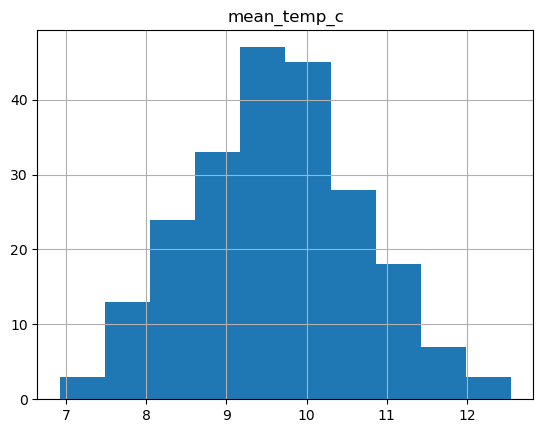

In [22]:
data_annual[["mean_temp_c"]].hist()

Or create a lineplot showing the mean temperature in Würzburg

<AxesSubplot: title={'center': 'Temperature in Würzburg'}, ylabel='Temperature in °C'>

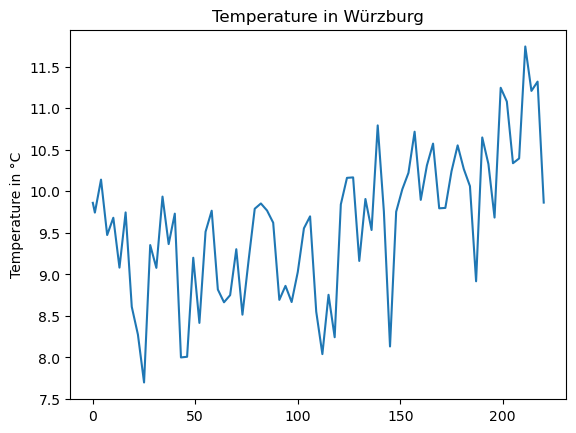

In [23]:
temp_wue = data_annual[data_annual['station_id'] == 'Würzburg']
temp_wue["mean_temp_c"].plot(title='Temperature in Würzburg',ylabel = 'Temperature in °C')

## Writing to disk

If we are finished with the manipulation of our dataset we can just write it back to disk. In this case we will save the data as CSV. 

In [26]:
data_annual.to_csv("../Data/nonspatial/dwd_annual.csv", index=False)

### Additional: Method Chaining

The nice thing with pandas is that we don't to apply all the operations one by one. We can just chain our commands

/tmp/ipykernel_24295/167774651.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby(pd.Grouper(freq='M')).mean()


<AxesSubplot: xlabel='datetime'>

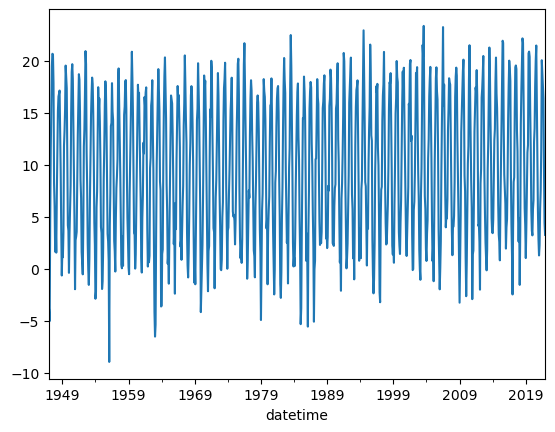

In [10]:
new_values = {5705:'Würzburg',282:'Bamberg',1420:'Frankfurt'}

temp = (pd.read_csv('../Data/nonspatial/station_data.csv')
  .replace({"station_id": new_values})
  .query("station_id == 'Würzburg' & parameter == 'temperature_air_mean_200'")
  .assign(datetime=lambda x: pd.to_datetime(x['date']))   
  .assign(mean_temp_c=lambda x: x.value - 273.15 )     
  .set_index('datetime')
  .groupby(pd.Grouper(freq='M')).mean()      
 )

temp['mean_temp_c'].plot()

## Alternative Packages

### Polars: Pandas DataFrame but Much Faster

Polars is a DataFrame interface on top of an OLAP Query Engine implemented in Rust using Apache Arrow Columnar Format as the memory model.

The goal of Polars is to provide a lightning fast DataFrame library that:

- Utilizes all available cores on your machine.
- Optimizes queries to reduce unneeded work/memory allocations.
- Handles datasets much larger than your available RAM.
- Has an API that is consistent and predictable.
- Has a strict schema (data-types should be known before running the query).

Polars is written in Rust which gives it C/C++ performance and allows it to fully control performance critical parts in a query engine

https://pola-rs.github.io/polars-book/user-guide/

In [1]:
%pip install polars

Note: you may need to restart the kernel to use updated packages.


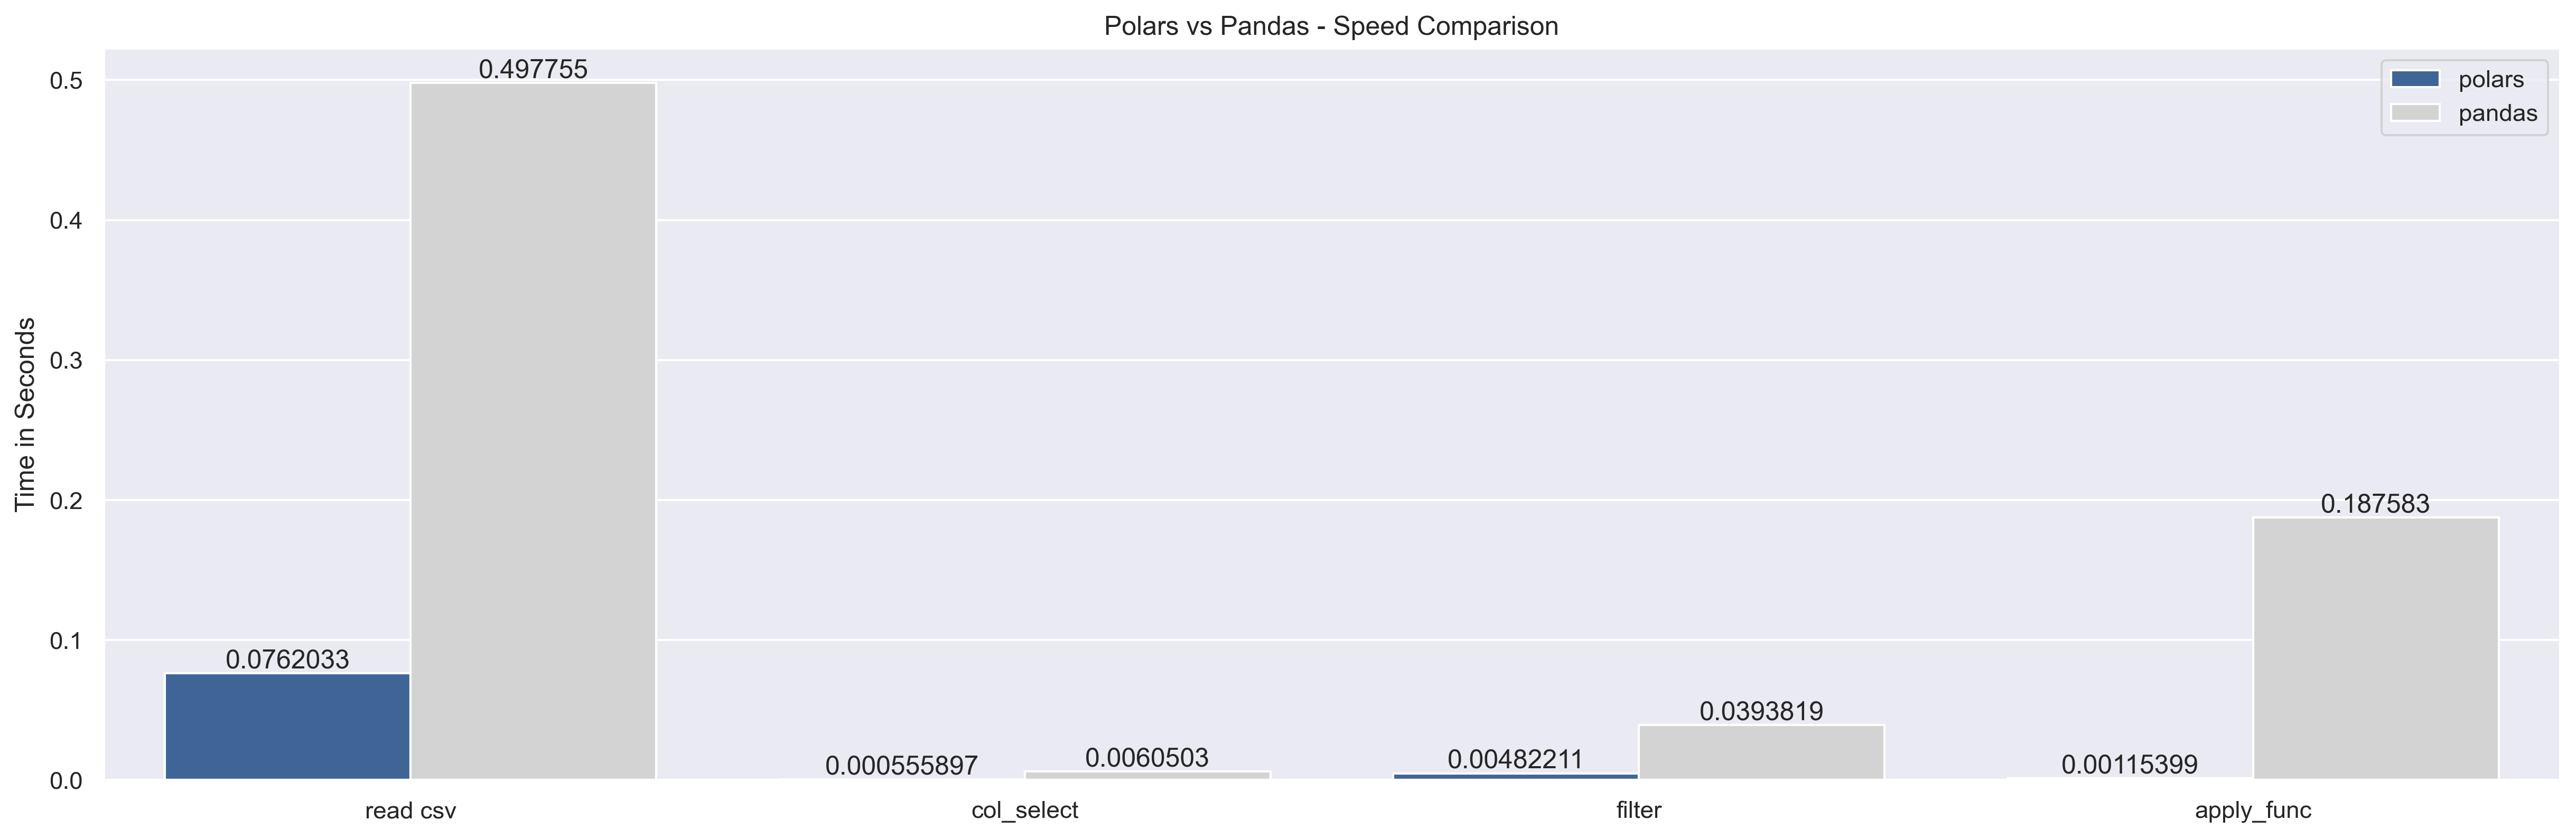

In [50]:
import pandas as pd
import polars as pl
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data From a CSV File
pandas_time = []
polars_time = []
for i in range(5):
    start = time.time()
    df_pandas = pd.read_csv("../Data/nonspatial/black_friday.csv")
    end = time.time()
    pandas_time.append(end-start)

    start = time.time()
    df_polars = pl.read_csv("../Data/nonspatial/black_friday.csv")
    end = time.time()
    polars_time.append(end-start)

pandas_read = sum(pandas_time)/5
polars_read = sum(polars_time)/5


# Selecting Columns
pandas_time = []
polars_time = []
for i in range(5):
    start = time.time()
    df_pandas_select = df_pandas[["User_ID", "Gender", "Purchase"]]
    end = time.time()
    pandas_time.append(end-start)

    start = time.time()
    df_polars_select = df_polars.select(["User_ID", "Gender", "Purchase"])
    end = time.time()
    polars_time.append(end-start)

pandas_col = sum(pandas_time)/5
polars_col = sum(polars_time)/5


# Filtering Rows
pandas_time = []
polars_time = []
for i in range(5):
    start = time.time()
    df_pandas_filter = df_pandas.loc[df_pandas["Age"] == "0-17"]
    end = time.time()
    pandas_time.append(end-start)

    start = time.time()
    df_polars_filter = df_polars.filter(pl.col("Age") == "0-17")
    end = time.time()
    polars_time.append(end-start)

pandas_filter = sum(pandas_time)/5
polars_filter = sum(polars_time)/5


# Applying Functions to Data
pandas_time = []
polars_time = []
for i in range(5):
    start = time.time()
    df_pandas_apply = df_pandas["Purchase"].apply(lambda x: x*2)
    end = time.time()
    pandas_time.append(end-start)

    start = time.time()
    df_polars_apply = df_polars.select(pl.col("Purchase") * 2)
    end = time.time()
    polars_time.append(end-start)

pandas_func = sum(pandas_time)/5
polars_func = sum(polars_time)/5


data = [
    # polars
    [polars_read, 'read csv', 'polars'], 
    [polars_col, 'col_select', 'polars'],
    [polars_filter, 'filter', 'polars'],
    [polars_func, 'apply_func', 'polars'],
    # pandas
    [pandas_read, 'read csv', 'pandas'], 
    [pandas_col, 'col_select', 'pandas'],
    [pandas_filter, 'filter', 'pandas'],
    [pandas_func, 'apply_func', 'pandas']

]

df = pl.DataFrame(data, schema=['time in seconds', 'test type', 'library'])

plt.figure(figsize=(20, 6))
ax = sns.barplot(x=list(df['test type']), y=list(df['time in seconds']), hue=list(df['library']), errorbar=None, palette=['#3063A5', '#d3d3d3'])

for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='', ylabel='Time in Seconds')
plt.title('Polars vs Pandas - Speed Comparison')
plt.show()


## Exercise 7

- Import ***GlobalLandTemperaturesByMajorCity.csv***
- Look at the first 5 entries
- Print the name of all the columns
- What is the number of observations in the dataset?
-  Display a summary of the basic information about this DataFrame and its data.
- Select just the 'AverageTemperature' and 'City' columns from the DataFrame
- Count the number of cities in the dataset
- Calculate the mean temperature for each city over all years. Sort the values in the 'AverageTemperature' - in decending order
- Calculate the maximal AverageTemperature in european cities between 1990 and 2013

 ## Visualize data with python

Producing high-quality graphics is one of the main reasons for doing statistical computing. For this purpose, we will use the matplotlib library, which is probably the most used python library for 2D-graphics. Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. Matplotlib allows a quick data visualization and the creation of publication-quality figures.
Import matplotlib's pyplot module as well as numpy and pandas.
(Pyplot is a module in the matplotlib package. The module allows you to implicitly and automatically create figures and axes)

Some of the major Pros of Matplotlib are:

- easy to get started for simple plots
- custom labels and texts
- control of every element in a figure
- high-quality output in many formats
 

In [ ]:
%pip install matplotlib

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### A Basic Plot

First we start with something easy.

In [10]:
df = pd.read_csv('../Data/non-spatial/dwd_annual.csv')
df

,year,station_id,precipitation_height,mean_temp_c,max_temp_c,min_temp_c
0,1947,Würzburg,1.382192,9.860822,19.430909,7.913818
1,1948,Würzburg,1.558743,9.743169,14.770219,5.327596
2,1949,Bamberg,1.171507,9.856164,15.007945,4.796986
3,1949,Frankfurt,1.340274,10.547945,15.253425,5.507671
4,1949,Würzburg,1.213425,10.140000,15.375890,5.305479
...,...,...,...,...,...,...
216,2020,Frankfurt,1.482240,12.130055,17.017760,7.001913
217,2020,Würzburg,1.350000,11.319399,16.210929,6.566667
218,2021,Bamberg,1.901370,9.083014,14.456164,3.824110
219,2021,Frankfurt,1.758904,10.579452,15.235342,5.906301


In [11]:
temp_wue = df[(df['station_id'] == 'Würzburg')]
temp_wue

,year,station_id,precipitation_height,mean_temp_c,max_temp_c,min_temp_c
0,1947,Würzburg,1.382192,9.860822,19.430909,7.913818
1,1948,Würzburg,1.558743,9.743169,14.770219,5.327596
4,1949,Würzburg,1.213425,10.140000,15.375890,5.305479
7,1950,Würzburg,1.887123,9.473425,14.210685,5.172329
10,1951,Würzburg,1.455890,9.681370,14.198356,5.598082
...,...,...,...,...,...,...
208,2017,Würzburg,1.723014,10.395068,14.996438,6.159726
211,2018,Würzburg,1.183836,11.742192,16.896986,6.976986
214,2019,Würzburg,1.344384,11.207671,16.160274,6.477534
217,2020,Würzburg,1.350000,11.319399,16.210929,6.566667


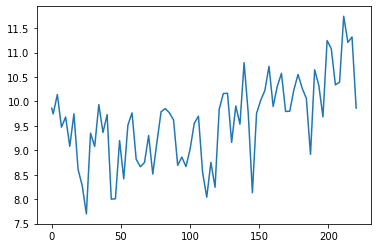

In [12]:
plt.plot(temp_wue['mean_temp_c'])

That was easy. But in order to customize our plot we have to understand a bit more about how the plt.plot() works. 
The plt.plot accepts 3 basic arguments in the following order: (x, y, format). Let's look deeper into the format parameter. If we want to change the styling of our plot we can do this via the a combination of {color}{marker}{line}. Let's assume we want to plot a green dots connected by dashed line. Therefor we would use the formatting code 'go--'.

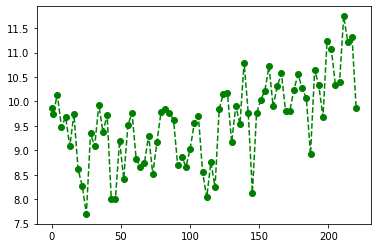

In [13]:
plt.plot(temp_wue['mean_temp_c'],'go--' )

Of course matplotlib offers a bunch of diffrent styling options:
- 'b'    : blue markers with default shape
- 'or'   : red circles
- '-g'   : green solid line
- '--'   : dashed line with default color
- '^k:'  : black triangle_up markers connected by a dotted line
- 'r*--' : ‘red stars with dashed lines’
- 'kp:' : ‘black pentagons with dotted line’
- 'bD-.' : ‘blue diamonds with the dash-dot line’.

Now that we have our first plot lets go through the things which are still missing. First of all we can see that the x-axis is still showing wrong values. This is because matplotlib will use the index by default. Let's change this

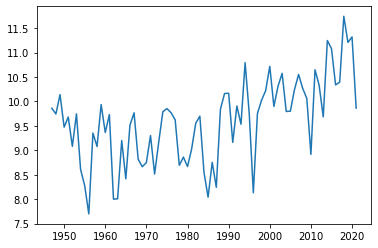

In [28]:
plt.plot(temp_wue['year'],temp_wue['mean_temp_c'])

In [ ]:
matplotlib offers a variety of different plot types. Here are just a few examples

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f67eac56fa0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f67eac56df0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f67eabe5e20>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f67eabf32b0>}

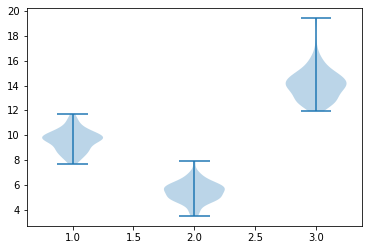

In [25]:
#plt.scatter(temp_wue['year'],temp_wue['mean_temp_c'])
#plt.bar(temp_wue['year'],temp_wue['mean_temp_c'])
#plt.stem(temp_wue['year'],temp_wue['mean_temp_c'])
#plt.hist(temp_wue['mean_temp_c'])
#plt.step(temp_wue['year'],temp_wue['mean_temp_c'])
#plt.boxplot(temp_wue[['mean_temp_c','min_temp_c','max_temp_c']])
plt.violinplot(temp_wue[['mean_temp_c','min_temp_c','max_temp_c']])

But let's move back to our lineplot. We already managed to plot the temperature per year. But of course a proper plot consists of more elements than just the graph and its values. 

<img src="images/matplot.jpg"  width=600/>

In [ ]:
plt.figure(figsize=(18,4), dpi=120)
plt.plot(temp_wue['year'],temp_wue['mean_temp_c'], label='Würzburg')
plt.title('Mean Temperature Würzburg')
plt.xlabel('Year')
plt.ylabel('Temperature in °Celsius')
plt.legend(loc='best')

Let's also add the maximum and the minimum temperature to our graph by just adding another plt.plot()

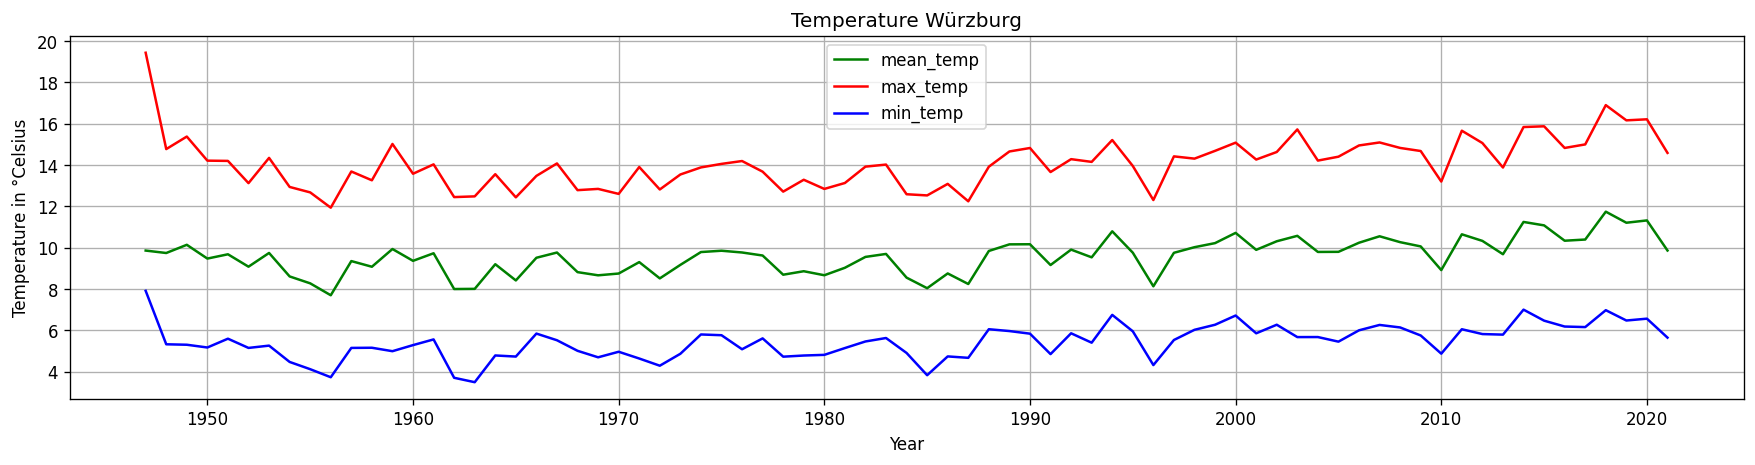

In [26]:
plt.figure(figsize=(18,4), dpi=120)
plt.plot(temp_wue['year'],temp_wue['mean_temp_c'],'-g', label='mean_temp')
plt.plot(temp_wue['year'],temp_wue['max_temp_c'],'-r', label='max_temp')
plt.plot(temp_wue['year'],temp_wue['min_temp_c'],'-b', label='min_temp')
plt.title('Temperature Würzburg')
plt.xlabel('Year')
plt.ylabel('Temperature in °Celsius')
plt.legend(loc='best')
plt.grid(True)

You can use the subplot() method to add more than one plot in a figure

In [30]:
temp_bam = df[(df['station_id'] == 'Bamberg')]
temp_bam

,year,station_id,precipitation_height,mean_temp_c,max_temp_c,min_temp_c
2,1949,Bamberg,1.171507,9.856164,15.007945,4.796986
5,1950,Bamberg,1.995890,9.353973,14.034521,5.068493
8,1951,Bamberg,1.776438,9.636986,14.454247,5.524932
11,1952,Bamberg,2.024590,8.407650,13.224863,3.959290
14,1953,Bamberg,1.062466,9.088767,14.504932,3.970685
...,...,...,...,...,...,...
206,2017,Bamberg,1.913973,9.570685,15.018082,3.916712
209,2018,Bamberg,1.207397,10.819178,16.926575,4.455616
212,2019,Bamberg,1.648219,10.343562,16.109041,4.378356
215,2020,Bamberg,1.539071,10.230055,15.901913,4.122404


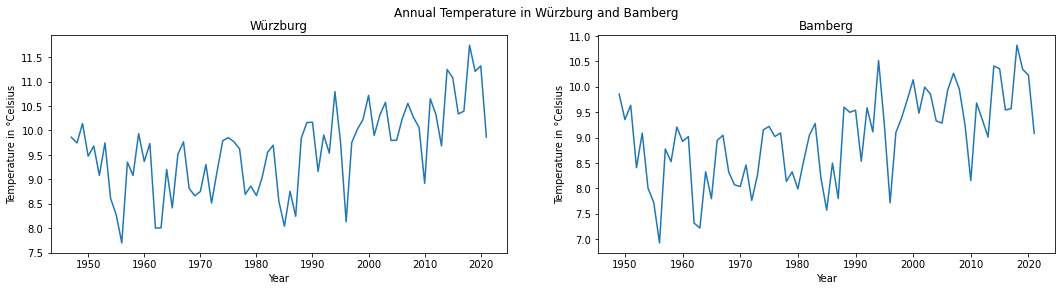

In [112]:
plt.figure(figsize=(18, 4))
plt.subplot(1,2,1)
plt.plot(temp_wue['year'],temp_wue['mean_temp_c'], label='Würzburg')
plt.title('Würzburg')
plt.xlabel('Year')
plt.ylabel('Temperature in °Celsius')

plt.subplot(1,2,2)
plt.plot(temp_bam['year'],temp_bam['mean_temp_c'], label='Bamberg')
plt.title('Bamberg')
plt.xlabel('Year')
plt.ylabel('Temperature in °Celsius')

plt.suptitle('Annual Temperature in Würzburg and Bamberg')
plt.show()


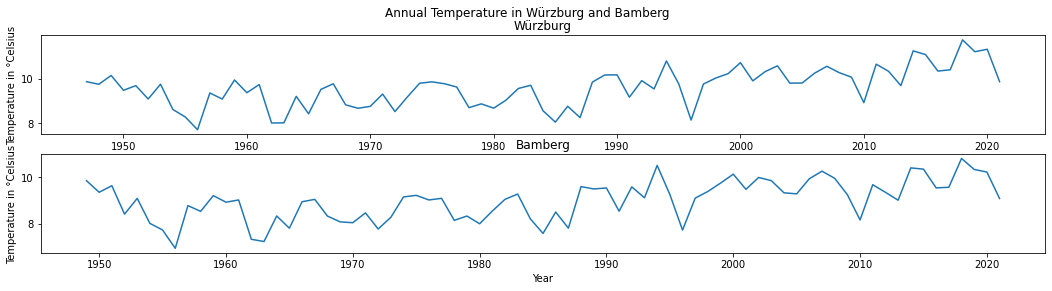

In [113]:
plt.figure(figsize=(18, 4))
plt.subplot(2,1,1)
plt.plot(temp_wue['year'],temp_wue['mean_temp_c'], label='Würzburg')
plt.title('Würzburg')
plt.xlabel('Year')
plt.ylabel('Temperature in °Celsius')

plt.subplot(2,1,2)
plt.plot(temp_bam['year'],temp_bam['mean_temp_c'], label='Bamberg')
plt.title('Bamberg')
plt.xlabel('Year')
plt.ylabel('Temperature in °Celsius')

plt.suptitle('Annual Temperature in Würzburg and Bamberg')
plt.show()

Unitl now you had a first glimpse into the world of matplotlib. But in order to create more advanced plot it is important to know a little bit more abbout matplotlib. One important big-picture matplotlib concept is its object hierarchy.

We already called the function plt.plot(). This one-liner hides the fact that a plot is really a hierarchy of nested Python objects. A “hierarchy” here means that there is a tree-like structure of matplotlib objects underlying each plot.

####   The Matplotlib Object Hierarchy


- When we call plt.plot(x, y), we internally create a hierarchy of nested Python objects: Figure and Axes.

- A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects.

- An Axes actually translates into what we think of as an individual plot or graph

- Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels


<img src="images/matplot.png" width=300/>


You can think of the Figure object as a box-like container holding one or more Axes (actual plots). Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels.

### Pyplot vs. Object-Oriented

matplotlib on the surface is made to imitate MATLAB's methods. All the pyplot commands make changes and modify the same figure. This is a state-based interface, where the state (i.e., the figure) is preserved through various function calls (i.e., the methods that modify the figure). This interface allows us to quickly and easily generate plots. The state-based nature of the interface allows us to add elements and/or modify the plot as we need, when we need it. This is the method which we have already used.

The pyplot interface makes it quite easy to create fast and easy plots. So why should we use a different method. Here is an example:

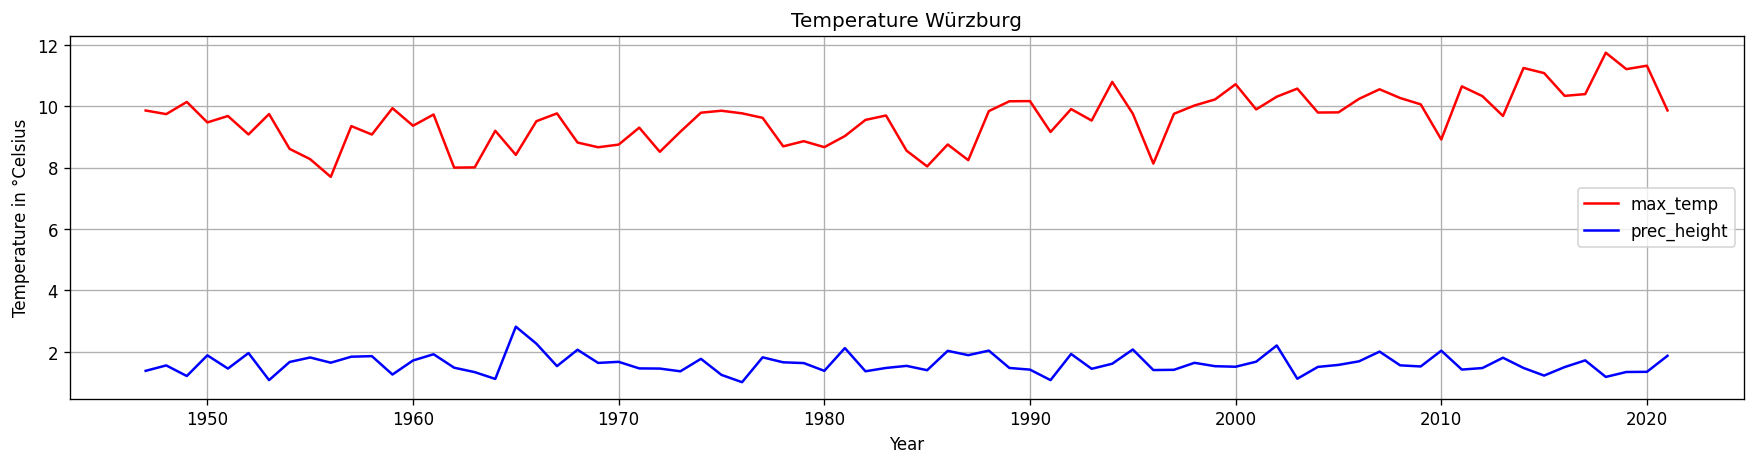

In [50]:
plt.figure(figsize=(18,4), dpi=120)
plt.plot(temp_wue['year'],temp_wue['mean_temp_c'],'-r', label='max_temp')
plt.plot(temp_wue['year'],temp_wue['precipitation_height'],'-b', label='prec_height')
plt.title('Temperature Würzburg')
plt.xlabel('Year')
plt.ylabel('Temperature in °Celsius')
plt.legend(loc='best')
plt.grid(True)

Here, we run into some obvious and serious issues. We can see that since both the quantities share the same axis but have very different magnitudes, the graph looks disproportionate. What we need to do is separate the two quantities on two different axes. This is where the second approach to making plot comes into play.

Also, the pyplot approach doesn't really scale when we are required to make multiple plots or when we have to make intricate plots that require a lot of customisation. However, internally matplotlib has an Object-Oriented interface that can be accessed just as easily, which allows to reuse objects.

Although this looks more complicated, using this method gives us full control over the plot

<img src="https://matplotlib.org/stable/_images/anatomy.png" width=600 />

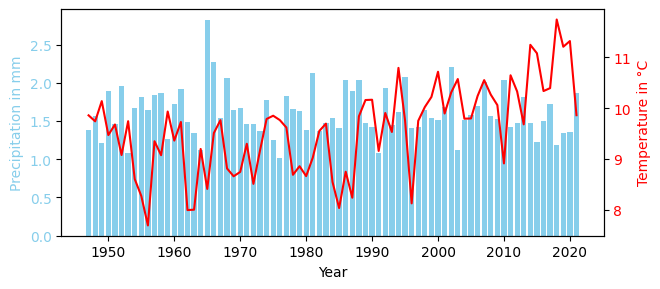

In [102]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("precipitation height")
ax1.set_xlabel("Year")
ax1.bar(temp_wue['year'],temp_wue['precipitation_height'], color='skyblue')
ax1.set_ylabel('Precipitation in mm')
ax1.yaxis.label.set_color('skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax2 = ax1.twinx() # create another y-axis sharing a common x-axis
ax2.set_ylabel("temperature air mean")
ax2.set_xlabel("Year")
ax2.plot(temp_wue['year'],temp_wue['mean_temp_c'], "red")
ax2.set_ylabel('Temperature in °C')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', labelcolor='red')

fig.set_size_inches(7,3)
fig.set_dpi(100)

plt.show()

or we can do something like that

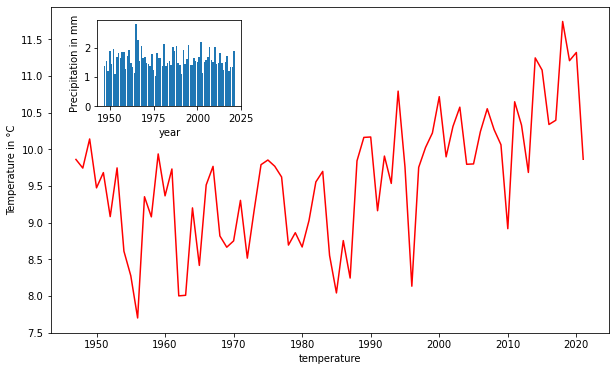

In [100]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_ylabel("temperature air mean")
ax1.set_xlabel("year")
ax1.set_xlabel("temperature")
ax1.plot(temp_wue['year'],temp_wue['mean_temp_c'], "red")
ax1.set_ylabel('Temperature in °C')
l, b, h, w = .19, .65, .2, .2
ax2 = fig.add_axes([l, b, w, h])
ax2.set_ylabel("precipitation height")
ax2.set_xlabel("year")
ax2.set_ylabel("precipitation")
ax2.bar(temp_wue['year'],temp_wue['precipitation_height'])
ax2.set_ylabel('Precipitation in mm')
plt.show()

In [179]:
new_values = {5705:'Würzburg',282:'Bamberg',1420:'Frankfurt'}

wue_monthly_temp = (pd.read_csv('../Data/non-spatial/station_data.csv')
  .replace({"station_id": new_values})
  .query("station_id == 'Würzburg'")
  .assign(datetime=lambda x: pd.to_datetime(x['date']))   
  .assign(mean_temp_c=lambda x: x.value - 273.15 )     
  .set_index('datetime')
  .groupby(pd.Grouper(freq='M')).mean()      
 )

wue_monthly_temp

,value,quality,mean_temp_c
datetime,,,
1947-01-31 00:00:00+00:00,134.962097,5.0,-138.187903
1947-02-28 00:00:00+00:00,134.787500,5.0,-138.362500
1947-03-31 00:00:00+00:00,140.063710,5.0,-133.086290
1947-04-30 00:00:00+00:00,214.175833,5.0,-58.974167
1947-05-31 00:00:00+00:00,216.833468,5.0,-56.316532
...,...,...,...
2021-08-31 00:00:00+00:00,218.639113,3.0,-54.510887
2021-09-30 00:00:00+00:00,217.452500,3.0,-55.697500
2021-10-31 00:00:00+00:00,212.462500,3.0,-60.687500


### Seaborn

Another powerful Python visualization library is seaborn which is based on matplotlib. Seaborn can do the same things as matplotlib and it makes plotting easier. It is often preferred, because user think the default settings in seaborn are more pleasing then in matplotlib. And the good thing is, if you know matplotlib, seaborn is really easy to learn. Let´s try some nice example plots (More plot examples can be found on http://seaborn.pydata.org/)

/home/wascal/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='mean_temp_c'>

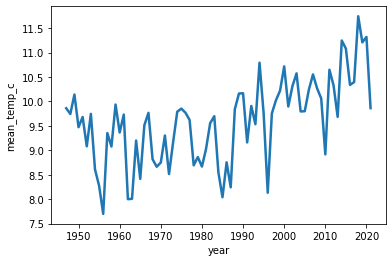

In [133]:
import seaborn as sns

sns.lineplot(temp_wue['year'],temp_wue['mean_temp_c'], linewidth=2.5)

/home/wascal/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


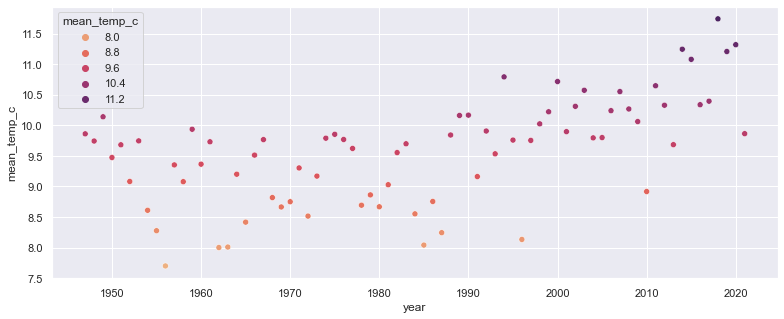

In [138]:
sns.set(style="darkgrid")

plt.figure(figsize=(13, 5))
ax = sns.scatterplot(temp_wue['year'],temp_wue['mean_temp_c'], palette="flare", hue=temp_wue['mean_temp_c'])

/home/wascal/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


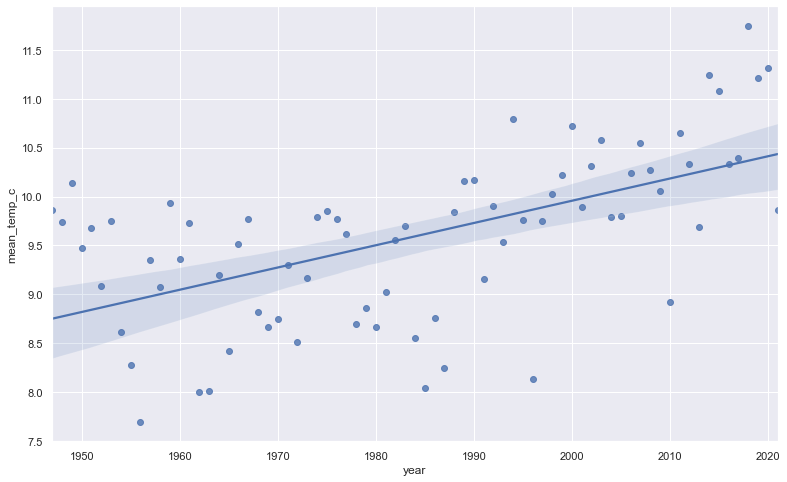

In [139]:
plt.figure(figsize=(13, 8))
ax = sns.regplot(temp_wue['year'],temp_wue['mean_temp_c'])

<AxesSubplot:xlabel='year', ylabel='precipitation_height'>

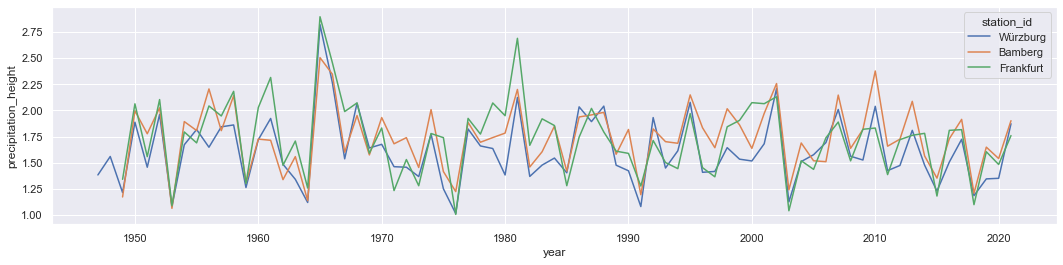

In [143]:
plt.figure(figsize=(18, 4))
sns.lineplot(data=df, x="year", y="precipitation_height", hue="station_id")

## Visualization alternatives

Few years ago matplotlib was the only answer to the question: "How do I make plots in python?". But nowadays we have a lot of choices. Each library takes a slightly different approach to plotting data. Which one you use is up to you.

In [158]:
import altair as alt
alt.data_transformers.disable_max_rows()

alt.Chart(temp_wue).mark_line().encode(
    alt.X('year:Q',scale=alt.Scale(zero=False)),
    alt.Y('mean_temp_c:Q',scale=alt.Scale(zero=False)),
    color=alt.Color(
        'mean(mean_temp_c):Q', scale=alt.Scale(scheme='reds', domain=(-5, 20))),
    tooltip=[
        alt.Tooltip('year', title='Year'),
        alt.Tooltip('mean(mean_temp_c):Q', title='AverageTemperature')
    ]
 ).properties(width=600, height=300)




alt.Chart(...)

In [161]:
%pip install plotly

     |████████████████████████████████| 15.2 MB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


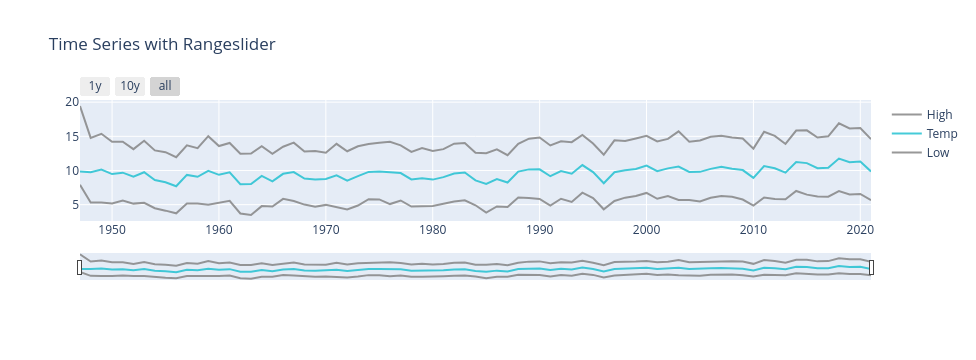

In [176]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


init_notebook_mode(connected=True)

trace_middle = go.Scatter(
    x=temp_wue.year, 
    y=temp_wue.mean_temp_c,
    name = "Temp",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_high = go.Scatter(
    x=temp_wue.year, 
    y=temp_wue.max_temp_c,
    name = "High",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)    
    
trace_low = go.Scatter(
      x=temp_wue.year, 
    y=temp_wue.min_temp_c,
    name = "Low",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_high,trace_middle,trace_low]

layout = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1y',
                     step='year',
                     stepmode='backward'),
                dict(count=6,
                     label='10y',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

#### Exercise 8

- Calculate the mean temperature (all countries) for each year plot the data
- Calculate the mean temperature of countries in Europe for each year (between 1990 and 2013). Create a plot with 4 graphs each showing the mean temperature for one season (spring, summer, autumn, winter) per year
- Calculate the intra-annual temperature difference for each country in Europe for the 2010 and create a barplot showing the ranked temperature difference 